<center><h1 style='font-size: 20px;'>UE1 - Data Manipulation - TCeau</h1></center>"

Importation des packages nécessaires

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from upsetplot import plot
from upsetplot import from_indicators, plot
import matplotlib as mpl

Importation du jeu de données

In [2]:
# Importation avec le bon encodage
theses=pd.read_csv("\PhD_V3.csv",low_memory=False,header=0,index_col=0,encoding='utf-8')

# Nombre de lignes
print(len(theses))

# Vérification de l'importation en affichant les premières lignes de code
theses.head()

448047


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_prÃ©di,Genre,etablissement_rec,Langue_rec
0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,...,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,...,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,...,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,Medecine,male,Université de Lorraine,Français
3,Emmanuel Porte,NaN,Socio-histoire des politiques publiques en mat...,Gilles Pollet,Pollet Gilles,na,Lyon 2,02640334X,Science politique,enCours,...,NaN,na,s88867,non,12-07-13,12-01-16,Droit et Science Politique,male,Université Lumière - Lyon 2,NaN
4,Arthur Devriendt,NaN,LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...,Gabriel Dupuy,Dupuy Gabriel,na,Paris 1,27361802,Geographie,enCours,...,NaN,na,s89663,non,13-07-13,12-07-13,SHS,male,Université Paris 1 - Panthéon Sorbonne,NaN


Corrections sur le jeu de données (caractères spéciaux et duplicates)

In [3]:
# Suppression des lignes dupliquées
theses = theses.drop_duplicates()

# Recodage de l'intitulé d'une colonne qui s'affiche mal
theses = theses.rename(columns={'Discipline_prÃ©di': 'Discipline_pred'})

# Vérification du nombre de lignes
print(len(theses))

# Affichage du dataframe
theses

447635


,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Year,Langue de la these,Identifiant de la these,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_pred,Genre,etablissement_rec,Langue_rec
0,Saeed Al marri,NaN,Le credit documentaire et l'onopposabilite des...,Philippe Delebecque,Delebecque Philippe,29561248,Paris 1,27361802,Driot prive,enCours,...,NaN,na,s69480,non,26-01-12,26-01-12,Droit et Science Politique,male,Université Paris 1 - Panthéon Sorbonne,NaN
1,Andrea Ramazzotti,174423705,Application de la PGD a la resolution de probl...,"Jean-Claude Grandidier,Marianne Beringhier","Grandidier Jean-Claude,Beringhier Marianne","715,441,511","Chasseneuil-du-Poitou, Ecole nationale superie...",28024400,"Mecanique des solides, des materiaux, des stru...",enCours,...,NaN,na,s98826,non,22-11-13,22-11-13,"Materiaux, Milieux et Chimie",female,École nationale supérieure de mécanique et d'a...,NaN
2,OLIVIER BODENREIDER,NaN,Conception d'un outil informatique d'etude des...,Francois Kohler,Kohler Francois,57030758,Nancy 1,NaN,Medecine,soutenue,...,1993.0,fr,1993NAN19006,non,24-05-13,17-11-12,Medecine,male,Université de Lorraine,Français
3,Emmanuel Porte,NaN,Socio-histoire des politiques publiques en mat...,Gilles Pollet,Pollet Gilles,na,Lyon 2,02640334X,Science politique,enCours,...,NaN,na,s88867,non,12-07-13,12-01-16,Droit et Science Politique,male,Université Lumière - Lyon 2,NaN
4,Arthur Devriendt,NaN,LES TECHNOLOGIES DE L'INFORMATION ET DE LA COM...,Gabriel Dupuy,Dupuy Gabriel,na,Paris 1,27361802,Geographie,enCours,...,NaN,na,s89663,non,13-07-13,12-07-13,SHS,male,Université Paris 1 - Panthéon Sorbonne,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
448041,Jocelyn Poncelet,NaN,Definition et gestion centralisee de l'assorti...,Jacky Montmain,Montmain Jacky,97727776,IMT Mines Ales,32486111,Informatique,enCours,...,NaN,na,s244348,non,06-07-20,08-07-20,Informatique,female,"Institut Mines-Télécom, au périmètre des école...",NaN
448042,Emir Roumili,NaN,Contribution a la demonstration de surete nucl...,"Vincent Chapurlat,Nicolas Daclin,Jerome Tixier","Chapurlat Vincent,Daclin Nicolas,Tixier Jerome",1,IMT Mines Ales,32486111,SYAM - Systemes Automatiques et Micro-Electron...,enCours,...,NaN,na,s244335,non,06-07-20,08-07-20,"Materiaux, Milieux et Chimie",male,"Institut Mines-Télécom, au périmètre des école...",NaN
448043,Nesrine Salah,NaN,Modelisation du comportement mecanique des bet...,"Anne-Sophie Caro,Moulay Said El Youssoufi,Etie...","Caro Anne-Sophie,El Youssoufi Moulay Said,Mala...",13905927X,IMT Mines Ales,32486111,Mecanique et Genie Civil,enCours,...,NaN,na,s244358,non,06-07-20,08-07-20,Science de l'ingÃ©nieur,female,"Institut Mines-Télécom, au périmètre des école...",NaN
448044,Ghulam sakhi Shokouh,NaN,Detection et classification d'objets dans des ...,"Philippe Montesinos,Baptiste Magnier","Montesinos Philippe,Magnier Baptiste","156,614,561",IMT Mines Ales,32486111,Informatique,enCours,...,NaN,na,s244354,non,06-07-20,08-07-20,Informatique,male,"Institut Mines-Télécom, au périmètre des école...",NaN


Principales caractéristiques du jeu de données

In [4]:
# Nom des colonnes
theses.columns

Index(['Auteur', 'Identifiant auteur', 'Titre', 'Directeur de these',
       'Directeur de these (nom prenom)', 'Identifiant directeur',
       'Etablissement de soutenance', 'Identifiant etablissement',
       'Discipline', 'Statut', 'Date de premiere inscription en doctorat',
       'Date de soutenance', 'Year', 'Langue de la these',
       'Identifiant de la these', 'Accessible en ligne',
       'Publication dans theses.fr', 'Mise a jour dans theses.fr',
       'Discipline_pred', 'Genre', 'etablissement_rec', 'Langue_rec'],
      dtype='object')

In [5]:
# Forme du jeu de données
print(theses.shape)

(447635, 22)


In [6]:
# Type de données que contient le dataframe
theses.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447635 entries, 0 to 448046
Data columns (total 22 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Auteur                                    447635 non-null  object 
 1   Identifiant auteur                        317652 non-null  object 
 2   Titre                                     447628 non-null  object 
 3   Directeur de these                        447622 non-null  object 
 4   Directeur de these (nom prenom)           447622 non-null  object 
 5   Identifiant directeur                     447635 non-null  object 
 6   Etablissement de soutenance               447634 non-null  object 
 7   Identifiant etablissement                 430553 non-null  object 
 8   Discipline                                447635 non-null  object 
 9   Statut                                    447635 non-null  object 
 10  Date de premiere ins

In [7]:
# Principaux indicateurs statistiques de la colonne qui contient des nombres
theses.describe()

,Year
count,390897.000000
mean,2003.247802
std,9.845586
min,1971.000000
25%,1994.000000
50%,2004.000000
75%,2012.000000
max,2020.000000


Travaux sur les données manquantes

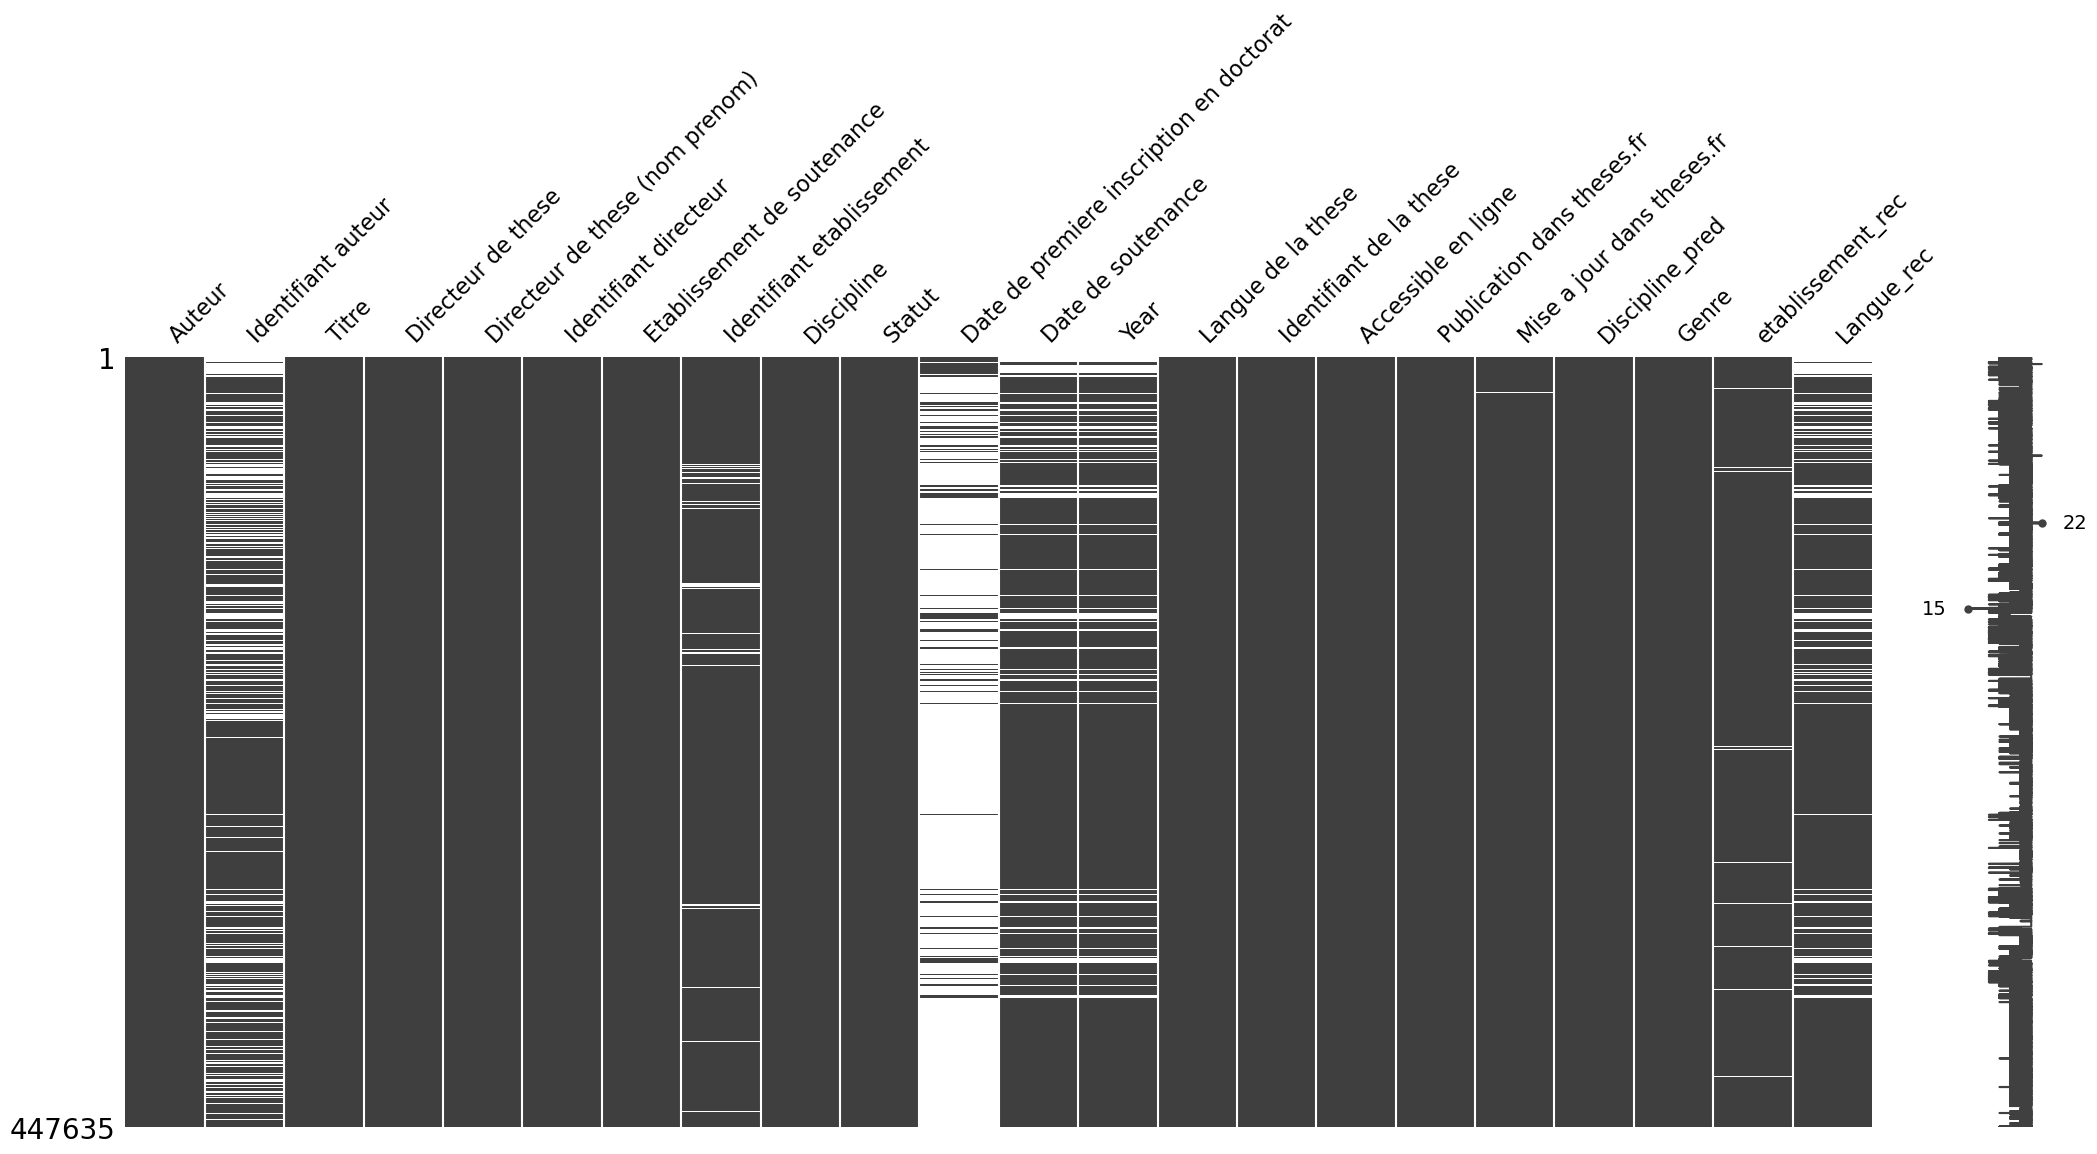

In [8]:
# Matrice de données manquantes 
matrice=msno.matrix(theses)

# Sauvegarde de la figure
plt.savefig("Matrice.png", dpi=300, bbox_inches='tight')

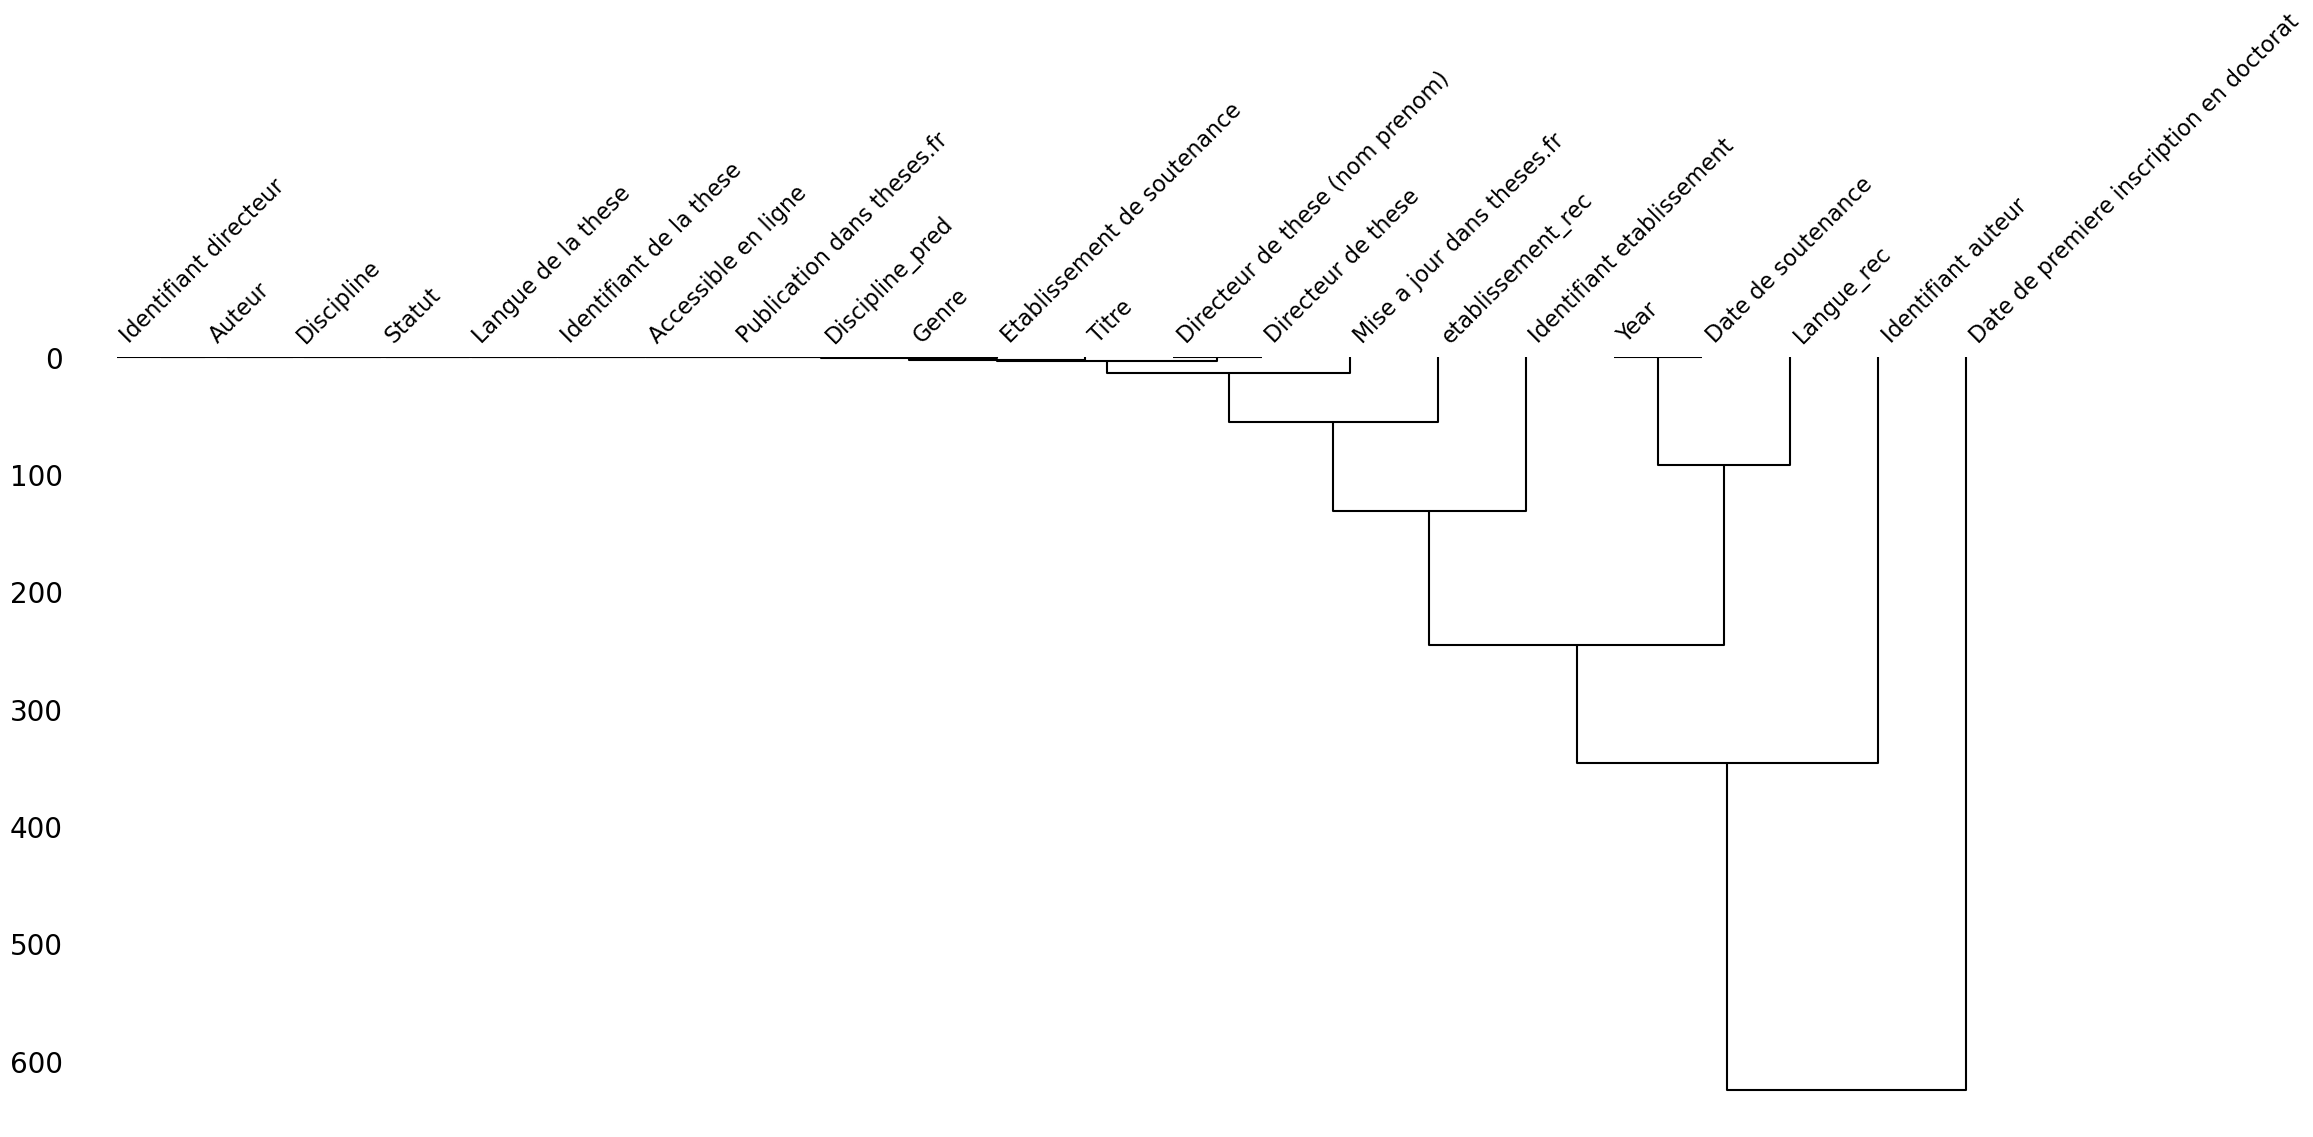

In [9]:
# Dendrogramme
msno.dendrogram(theses)

# Sauvegarde de la figure
plt.savefig("Dendrogramme.png", dpi=300, bbox_inches='tight')

In [10]:
# Création de l'UpSetplot
# Sélection des colonnes qui ont des données manquantes selon la matrice précédente
theses_upset=theses[["Identifiant auteur","Identifiant etablissement",
                     "Date de premiere inscription en doctorat","Date de soutenance",
                     "etablissement_rec","Langue_rec"]]

# Vérification des colonnes prises en compte
theses_upset.head(10)

,Identifiant auteur,Identifiant etablissement,Date de premiere inscription en doctorat,Date de soutenance,etablissement_rec,Langue_rec
0,NaN,27361802,30-09-11,NaN,Université Paris 1 - Panthéon Sorbonne,NaN
1,174423705,28024400,01-10-12,NaN,École nationale supérieure de mécanique et d'a...,NaN
2,NaN,NaN,NaN,01-01-93,Université de Lorraine,Français
3,NaN,02640334X,01-06-11,NaN,Université Lumière - Lyon 2,NaN
4,NaN,27361802,07-12-09,NaN,Université Paris 1 - Panthéon Sorbonne,NaN
5,NaN,26404788,01-12-02,24-11-08,Université de Paris,NaN
6,NaN,28209966,01-02-02,01-07-05,Université Jean Monnet,NaN
7,NaN,26404451,01-10-03,08-12-09,Université de La Réunion,NaN
8,NaN,26403552,01-11-03,10-01-13,Université Paris 8 - Vincennes - Saint-Denis,NaN
9,NaN,26403447,01-12-02,24-06-11,Université de Nantes,NaN


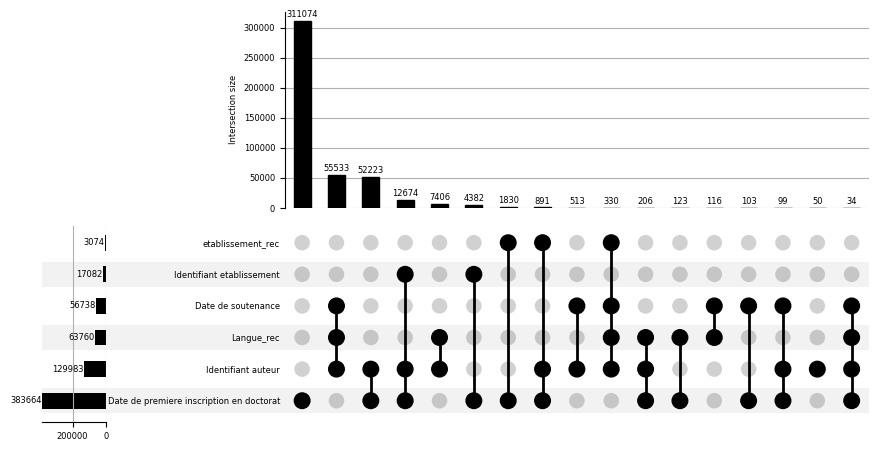

In [11]:
# Création de l'UpSetplot à partir du tableau précédent
mpl.rcParams['font.size'] = 6
UpSetplot=plot(from_indicators(indicators=pd.isna, data=theses_upset), 
               show_counts=True,sort_by="cardinality",min_subset_size=20)

# Affichage de l'UpSetplot
plt.show()

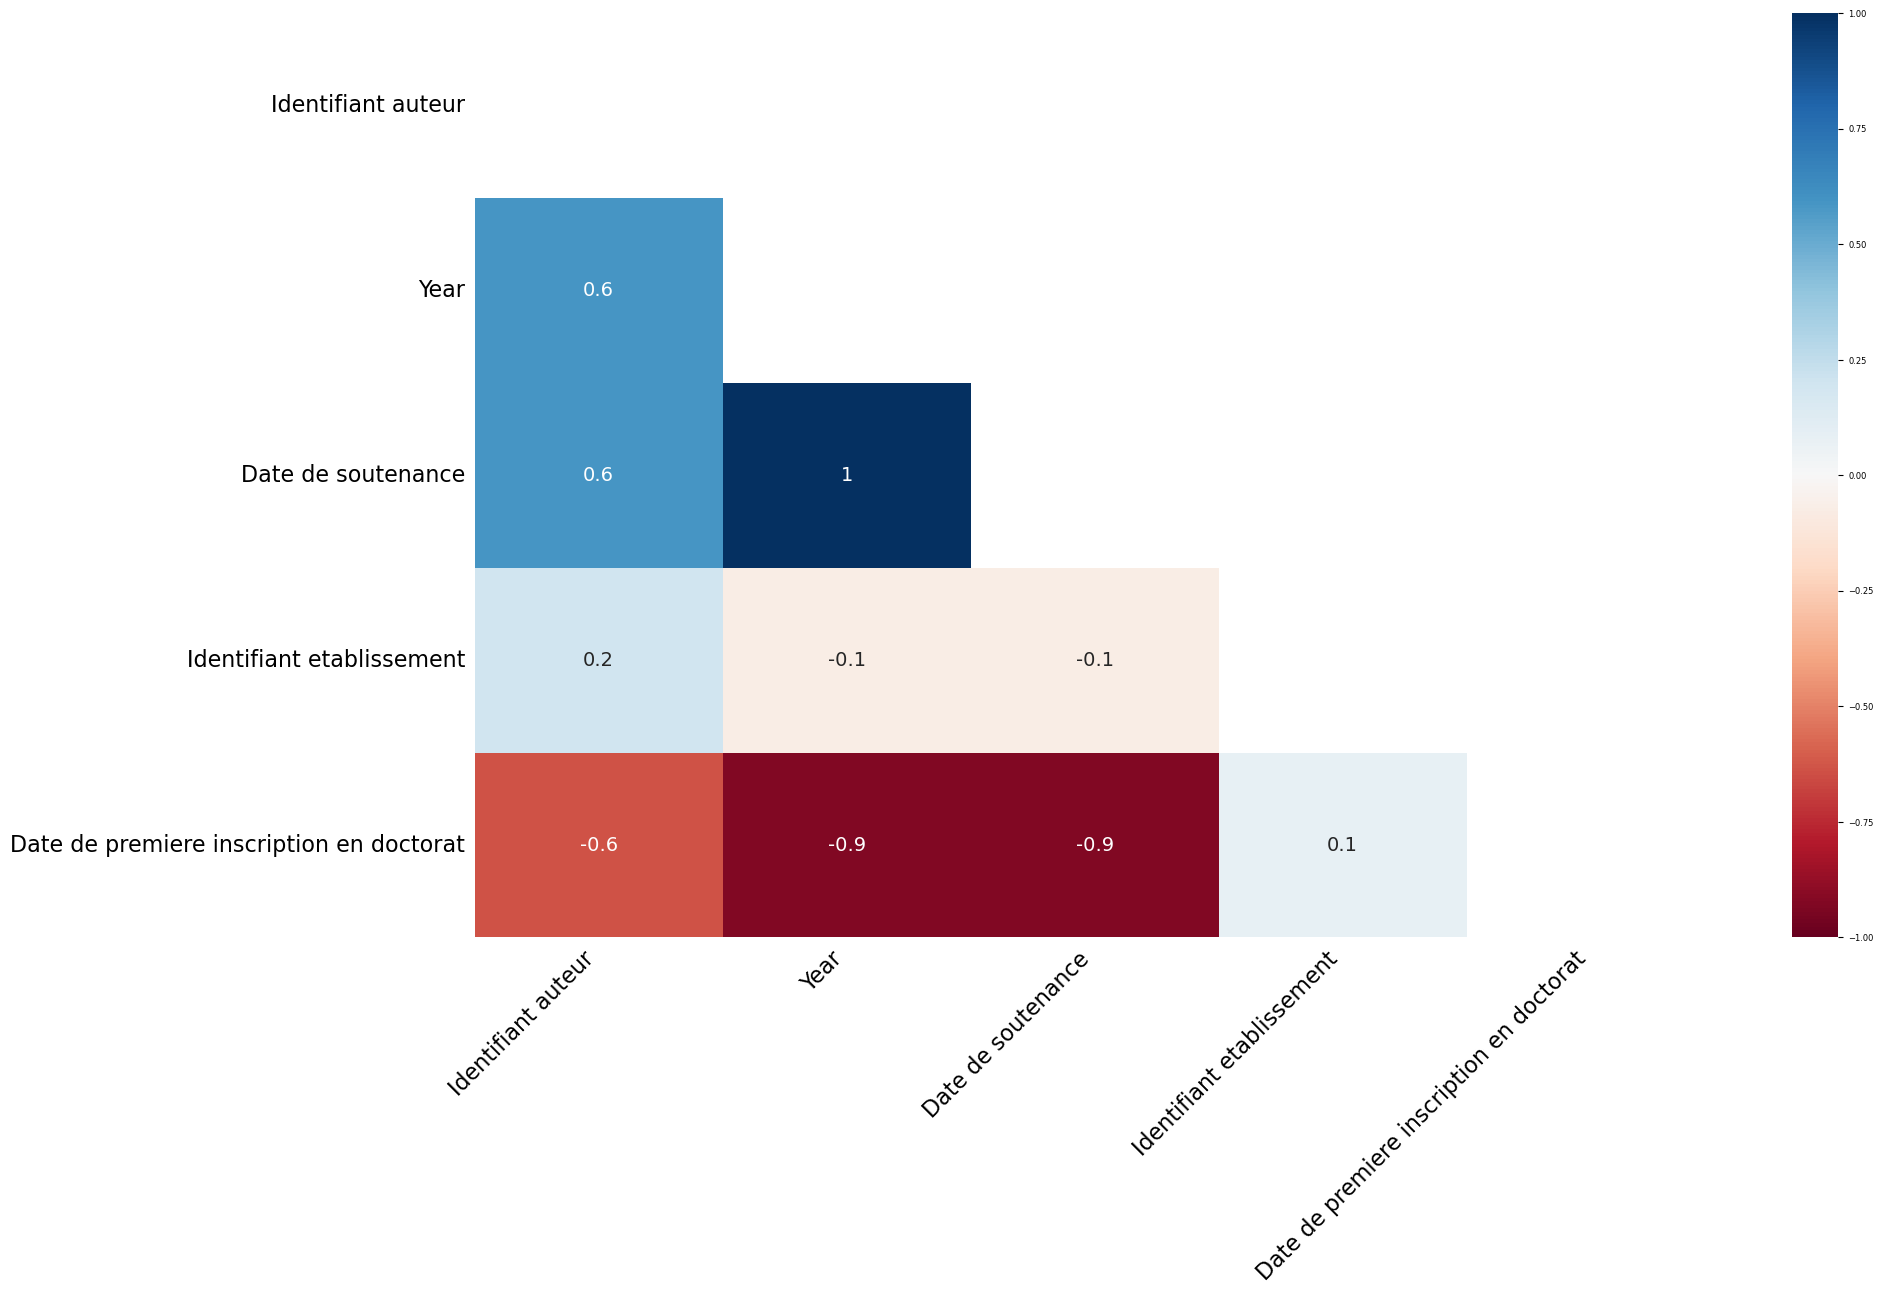

In [12]:
# Heatmap sur les colonnes ayant le plus de données manquantes
theses_heatmap=theses[["Identifiant auteur","Year",
                       "Date de soutenance","Identifiant etablissement",
                       "Statut",'Date de premiere inscription en doctorat']]

# Création du graphique
msno.heatmap(theses_heatmap)

# Sauvegarde de la figure
plt.savefig("Heatmap.png", dpi=300, bbox_inches='tight')

Pourcentage de données manquantes par colonne

In [13]:
# Calcul du nombre de valeurs manquantes par colonne
missing_values = theses.isnull().sum()

# Calcul du pourcentage de valeurs manquantes par colonne
percent_missing = (missing_values / len(theses)) * 100

# Nouveau DataFrame pour stocker les résultats
missing_value_theses = pd.DataFrame({'missing_percent': percent_missing})

# Affichage le DataFrame trié par ordre décroissant du pourcentage de valeurs manquantes
missing_value_theses.sort_values('missing_percent', ascending=False)

                                          missing_percent
Date de premiere inscription en doctorat        85.709116
Identifiant auteur                              29.037720
Langue_rec                                      14.243748
Year                                            12.675059
Date de soutenance                              12.675059
Identifiant etablissement                        3.816055
etablissement_rec                                0.686720
Mise a jour dans theses.fr                       0.039541
Directeur de these (nom prenom)                  0.002904
Directeur de these                               0.002904
Titre                                            0.001564
Etablissement de soutenance                      0.000223
Identifiant directeur                            0.000000
Publication dans theses.fr                       0.000000
Genre                                            0.000000
Discipline_pred                                  0.000000
Langue de la t

Heatmap en fonction du statut de la thèse

In [14]:
# Heatmap En cours/Soutenue
# Selection des variables d'intérêt (celles qui contiennent des données manquantes)
theses_heatmap=theses[["Identifiant auteur","Date de soutenance",
                       "Identifiant etablissement","Statut",
                       'Date de premiere inscription en doctorat']]

# Création d'un tableau intermédiaire pour la heatmap
heatmap_final=theses_heatmap.drop('Statut',axis=1)
                .isna().groupby(theses_heatmap["Statut"])
                .sum().transpose()
        
# Affichage du tableau
heatmap_final

Statut,enCours,soutenue
Identifiant auteur,66100,63883
Date de soutenance,56622,116
Identifiant etablissement,1,17081
Date de premiere inscription en doctorat,2352,381312


In [15]:
# Transformation du tableau précédent en pourcentage
heatmap_pourcentage = (heatmap_final / len(theses)) * 100

# Affichage du tableau obtenu
heatmap_pourcentage

Statut,enCours,soutenue
Identifiant auteur,14.766495,14.271225
Date de soutenance,12.649145,0.025914
Identifiant etablissement,0.000223,3.815832
Date de premiere inscription en doctorat,0.525428,85.183688


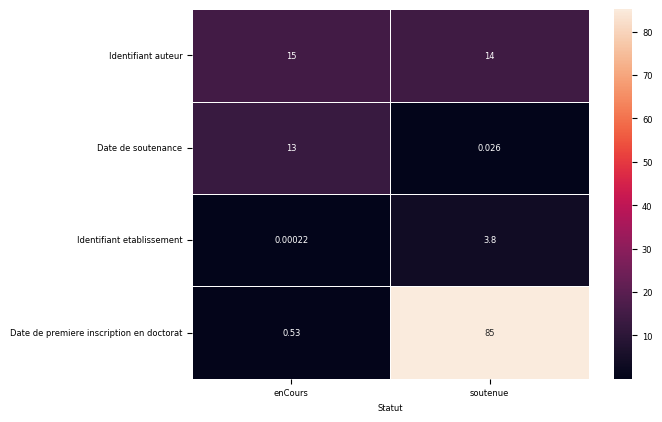

In [16]:
# Création de la heatmap
sns.color_palette("flare", as_cmap=True)
sns.heatmap(heatmap_pourcentage,annot=True,linewidth=.5)

# Sauvegarde de la figure
plt.savefig("Heatmap encours soutenue.png", dpi=300, bbox_inches='tight')

Travail sur la date de soutenance

In [17]:
# Conversion de la colonne de date en format de date
theses['Date de soutenance'] = pd.to_datetime(theses['Date de soutenance'])

# Ajout de nouvelles colonnes jour, mois, année correspondantes
theses['jour']=theses["Date de soutenance"].dt.day
theses['mois'] = theses["Date de soutenance"].dt.month
theses["annee"] = theses["Date de soutenance"].dt.year

# Nouveau dataframe intermédiaire avec les colonnes concernant les soutenances
theses_soutenance=theses.loc[:,["Date de soutenance","jour","mois","annee"]]

# Affichage des premières lignes du dataframe
theses_soutenance.head(10)

,Date de soutenance,jour,mois,annee
0,NaT,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN
2,1993-01-01,1.0,1.0,1993.0
3,NaT,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN
5,2008-11-24,24.0,11.0,2008.0
6,2005-01-07,7.0,1.0,2005.0
7,2009-08-12,12.0,8.0,2009.0
8,2013-10-01,1.0,10.0,2013.0
9,2011-06-24,24.0,6.0,2011.0


In [18]:
# Suppression des lignes de date de soutenance vides et remplacement des mois par leur nom
theses_soutenance=theses_soutenance.dropna()
theses_soutenance["jour"]=theses_soutenance["jour"].astype(int)
theses_soutenance["mois"]=theses_soutenance["mois"].astype(int)
theses_soutenance["annee"]=theses_soutenance["annee"].astype(int)

# Affichage du nombre de lignes retenu
print(len(theses_soutenance))

# Affichage des premières lignes du dataframe
theses_soutenance.head(10)

390897


,Date de soutenance,jour,mois,annee
2,1993-01-01,1,1,1993
5,2008-11-24,24,11,2008
6,2005-01-07,7,1,2005
7,2009-08-12,12,8,2009
8,2013-10-01,1,10,2013
9,2011-06-24,24,6,2011
10,2010-11-26,26,11,2010
14,2007-12-20,20,12,2007
15,2011-06-10,10,6,2011
16,2012-08-31,31,8,2012


Distribution du mois de soutenance sur la période 1984-2018

In [19]:
# Sélection des colonnes d'intérêt et nombre de lignes retenues
theses_mois=theses_soutenance[["annee","mois"]]
theses_mois=theses_mois[(theses_mois["annee"]<=2018)&(theses_mois["annee"]>=1984)]

# Affichage du nombre de lignes du dataframe
print(len(theses_mois))

# Affichage des premières lignes du dataframe
theses_mois.head(10)

379109


,annee,mois
2,1993,1
5,2008,11
6,2005,1
7,2009,8
8,2013,10
9,2011,6
10,2010,11
14,2007,12
15,2011,6
16,2012,8


In [20]:
# Groupement par mois et par année et rajout du pourcentage
theses_mois= theses_mois.groupby(['annee', 'mois']).size().reset_index(name='count')
theses_mois["pourcentage"] = theses_mois.groupby("annee")["count"]
                            .apply(lambda x: (x / x.sum()) * 100)
theses_mois=theses_mois.reset_index(drop=False)

# Remplacement des nombres en mois de l'année
mois_dict = {1.0: 'Janvier', 2.0: 'Février', 3.0: 'Mars', 
             4.0: 'Avril', 5.0: 'Mai', 6.0: 'Juin', 
             7.0: 'Juillet', 8.0: 'Août', 9.0: 'Septembre', 
             10.0: 'Octobre', 11.0: 'Novembre', 12.0: 'Décembre'}

# Map et affichage du dataframe obtenu
theses_mois['mois'] = theses_mois['mois'].map(mois_dict)
theses_mois

,index,annee,mois,count,pourcentage
0,0,1984,Janvier,6,100.000000
1,1,1985,Janvier,3007,100.000000
2,2,1986,Janvier,5162,100.000000
3,3,1987,Janvier,8439,100.000000
4,4,1988,Janvier,11045,100.000000
...,...,...,...,...,...
244,244,2018,Août,336,2.623975
245,245,2018,Septembre,1432,11.183132
246,246,2018,Octobre,1270,9.918001
247,247,2018,Novembre,2229,17.407263


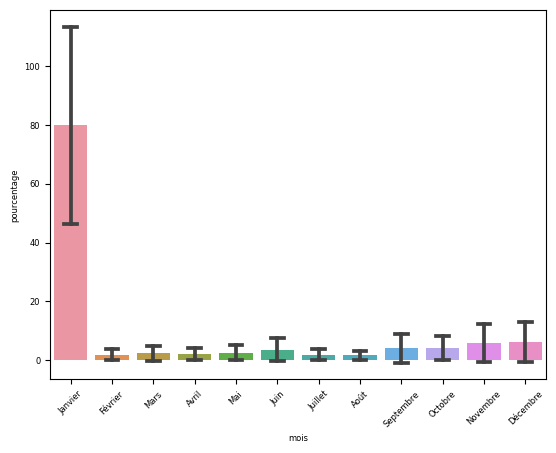

In [21]:
# Graphique 
sns.color_palette("Paired")
g=sns.barplot(data=theses_mois,x="mois",y="pourcentage",ci='sd',capsize = 0.3, 
              order=["Janvier","Février","Mars","Avril","Mai","Juin",
                     "Juillet","Août","Septembre","Octobre","Novembre","Décembre"])
plt.xticks(rotation=45)

# Sauvegarde de la figure
plt.savefig("Soutenance par mois 84 18.png", dpi=300, bbox_inches='tight')

Construction du Facetgrid par année entre 2005 et 2018

In [22]:
# Construction de la base de données 
facetgrid_annee_copy=theses_soutenance[["annee","mois"]]
facetgrid_annee=facetgrid_annee_copy.copy()

# Remplacement des nombres en mois de l'année
mois_dict = {1.0: 'Janvier', 2.0: 'Février', 3.0: 'Mars', 
             4.0: 'Avril', 5.0: 'Mai', 6.0: 'Juin', 
             7.0: 'Juillet', 8.0: 'Août', 9.0: 'Septembre', 
             10.0: 'Octobre', 11.0: 'Novembre', 12.0: 'Décembre'}

# Map des mois dans le datframe
facetgrid_annee['mois'] = facetgrid_annee["mois"].map(mois_dict)

# Sélection des années d'intérêt (entre 2005 et 2018)
facetgrid_annee=facetgrid_annee[(facetgrid_annee["annee"]<=2018)&(facetgrid_annee["annee"]>=2005)]

# Nombre de lignes du dataframe
len(facetgrid_annee)

# Affichage du dataframe obtenu
facetgrid_annee

,annee,mois
5,2008,Novembre
6,2005,Janvier
7,2009,Août
8,2013,Octobre
9,2011,Juin
...,...,...
447999,2018,Juin
448000,2015,Novembre
448015,2018,Décembre
448025,2018,Juillet


In [23]:
# Groupement par année et par mois de soutenance avec count
facetgrid_annee=facetgrid_annee.groupby(['annee', 'mois']).size().reset_index(name='count')

# Affichage du dataframe obtenu
facetgrid_annee

,annee,mois,count
0,2005,Août,2
1,2005,Avril,1
2,2005,Décembre,6
3,2005,Février,1
4,2005,Janvier,10526
...,...,...,...
163,2018,Mai,921
164,2018,Mars,807
165,2018,Novembre,2229
166,2018,Octobre,1270


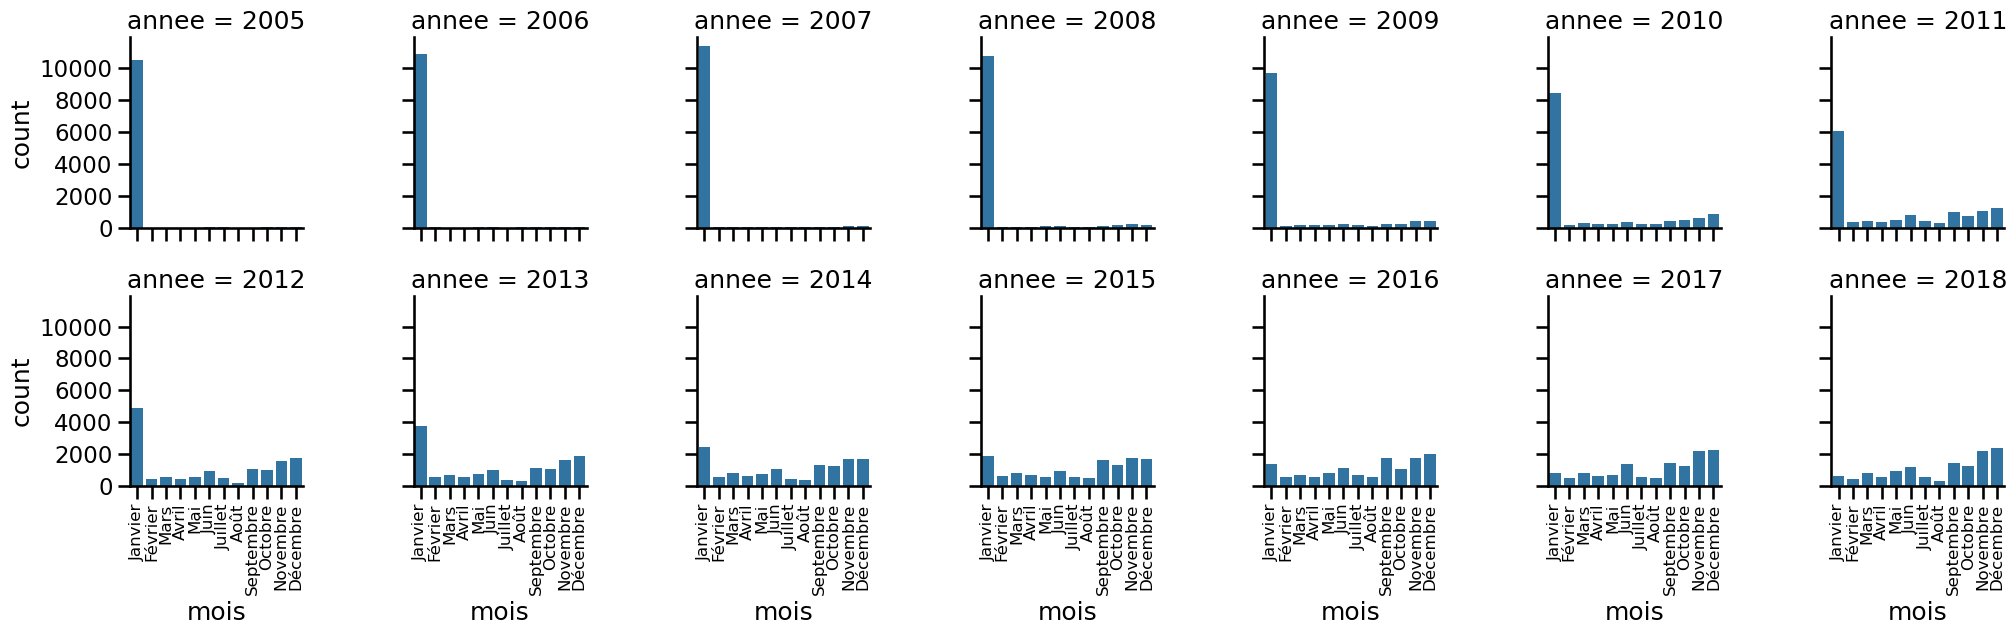

In [24]:
# Facet grid années et mois de soutenance
with sns.plotting_context("talk"):
    g=sns.FacetGrid(facetgrid_annee, col="annee",col_wrap=7)
    g.map(sns.barplot,'mois','count',order=["Janvier","Février","Mars","Avril","Mai","Juin","Juillet","Août","Septembre","Octobre","Novembre","Décembre"])
    g.set_axis_labels(xlabel="Mois", ylabel="Count",label='big')
    for ax in g.axes.flat:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=90,fontsize=12)


Construction du lineplot sur la date du premier janvier

In [25]:
# Sélection des dates soutenues au premier janvier
premier_janvier=theses_soutenance.loc[(theses_soutenance['jour'] == 1) & (theses_soutenance['mois'] ==1)]

# Nombre de lignes du dataframe
print(len(premier_janvier))

# Affichage des premières lignes du dataframe
premier_janvier.head(20)

281012


,Date de soutenance,jour,mois,annee
2,1993-01-01,1,1,1993
79,2015-01-01,1,1,2015
134,2015-01-01,1,1,2015
615,2012-01-01,1,1,2012
629,2014-01-01,1,1,2014
844,2012-01-01,1,1,2012
942,2014-01-01,1,1,2014
1072,2012-01-01,1,1,2012
1362,2012-01-01,1,1,2012
1369,2014-01-01,1,1,2014


In [26]:
# Comptage du nombre total de thèses soutenues par année et du nombre total de thèses soutenues au premier janvier par année
premier_janvier_count=premier_janvier.groupby(['annee']).agg({'jour': 'count'})

# Idem
total_count=theses_soutenance.groupby(['annee']).agg({'jour': 'count'})
total_count

        jour
annee       
1973       1
1976       1
1979       1
1980       1
1982       1
1984       6
1985    3007
1986    5162
1987    8439
1988   11045
1989   11102
1990   11011
1991   10831
1992   12065
1993   12309
1994   12991
1995   10569
1996   11354
1997   11665
1998   11015
1999   10950
2000   10811
2001    9440
2002    9369
2003    9834
2004   10220
2005   10522
2006   10885
2007   11349
2008   10686
2009    9554
2010    8190
2011    5605
2012    4398
2013    3237
2014    1666
2015    1069
2016     633
2017      15
2018       1
2071       1
2072       1


,jour
annee,
1973,1
1976,1
1979,1
1980,1
1982,1
1984,6
1985,3007
1986,5162
1987,8439


In [27]:
# Transformation en pourcentage de thèses soutenues au premier janvier et sélection des années 2005 à 2018
pourcentage_theses_premier_janvier=premier_janvier_count/total_count*100
pourcentage_theses_premier_janvier=pourcentage_theses_premier_janvier.iloc[26:40,:]

# Affichage du dataframe obtenu
pourcentage_theses_premier_janvier

,jour
annee,
2005,99.621284
2006,99.179954
2007,97.024878
2008,90.146786
2009,79.398321
2010,65.436242
2011,42.753623
2012,31.447980
2013,23.341506


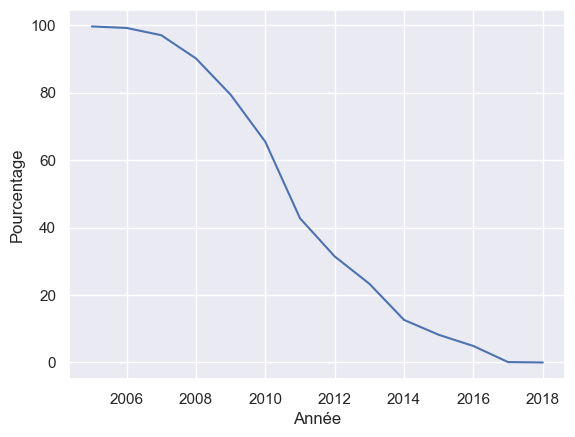

In [28]:
#Graphique
sns.set()
sns.lineplot(data=pourcentage_theses_premier_janvier,x="annee",y="jour")
plt.xlabel("Année")
plt.ylabel("Pourcentage")

# Sauvegarde de la figure
plt.savefig("Premier janvier.png", dpi=300, bbox_inches='tight')

Distribution du mois de soutenance sur la période 1984-2018 en ayant écarté les dates du premier janvier

In [29]:
# Création du jeu de données intermédiaire
soutenance_reelle=theses_soutenance[(theses_soutenance['jour'] != 1) | (theses_soutenance['mois'] != 1)]
soutenance_reelle=soutenance_reelle[(soutenance_reelle["annee"]<=2018)&(soutenance_reelle["annee"]>=1984)]

# Recodage des mois
mois_dict = {1.0: 'Janvier', 2.0: 'Février', 3.0: 'Mars', 
             4.0: 'Avril', 5.0: 'Mai', 6.0: 'Juin', 
             7.0: 'Juillet', 8.0: 'Août', 9.0: 'Septembre', 
             10.0: 'Octobre', 11.0: 'Novembre', 12.0: 'Décembre'}

# Map entre mois en nomre et mois en lettres
soutenance_reelle['mois'] = soutenance_reelle['mois'].map(mois_dict)

# Affichage du nombre de lignes du dataframe
print(len(soutenance_reelle))

# Groupement des lignes par mois et année
soutenance_reelle=soutenance_reelle.groupby(["mois","annee"]).size()
soutenance_reelle=soutenance_reelle.reset_index(name='count')

# Transformation de la donnée créée en pourcentage
soutenance_reelle["pourcentage"] = soutenance_reelle.groupby("annee")["count"].apply(lambda x: (x / x.sum()) * 100)
soutenance_reelle=soutenance_reelle.reset_index(drop=False)

# Affichage du dataframe obtenu
soutenance_reelle

98104


,index,mois,annee,count,pourcentage
0,0,Août,1999,3,9.375000
1,1,Août,2000,2,4.545455
2,2,Août,2002,2,7.407407
3,3,Août,2005,2,5.000000
4,4,Août,2006,6,6.666667
...,...,...,...,...,...
229,229,Septembre,2014,1351,11.711165
230,230,Septembre,2015,1655,13.844738
231,231,Septembre,2016,1773,14.377230
232,232,Septembre,2017,1440,10.985658


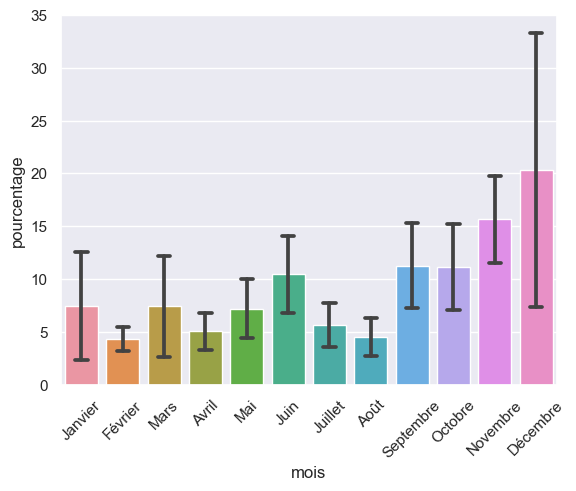

In [30]:
# Construction du graphique
sns.barplot(data=soutenance_reelle,x="mois",y="pourcentage",ci='sd',capsize=0.3,
            order=["Janvier","Février","Mars","Avril","Mai","Juin",
                   "Juillet","Août","Septembre","Octobre","Novembre","Décembre"])
plt.xticks(rotation=45)

# Sauvegarde de la figure
plt.savefig("Soutenance par mois sans premier janvier.png", dpi=300, bbox_inches='tight')

Cas des homonymes dans les auteurs

In [31]:
# Sélection des auteurs de thèse
auteurs=theses[["Identifiant auteur","Auteur","Discipline_pred","annee"]]

# Affichage des premières lignes du dataframe
auteurs.head(10)

,Identifiant auteur,Auteur,Discipline_pred,annee
0,NaN,Saeed Al marri,Droit et Science Politique,NaN
1,174423705,Andrea Ramazzotti,"Materiaux, Milieux et Chimie",NaN
2,NaN,OLIVIER BODENREIDER,Medecine,1993.0
3,NaN,Emmanuel Porte,Droit et Science Politique,NaN
4,NaN,Arthur Devriendt,SHS,NaN
5,NaN,Elmantsr Briak,Droit et Science Politique,2008.0
6,NaN,Jae-hyun Park,Droit et Science Politique,2005.0
7,NaN,Laurent david Benoiton,Droit et Science Politique,2009.0
8,NaN,Jennifer Guiraud (McKELLIPS),Biologie,2013.0
9,NaN,Nathalie Warcholak (David),Droit et Science Politique,2011.0


In [32]:
# Hyperdocteurs
auteurs_counts=auteurs.groupby(["Identifiant auteur","Auteur"])
                .size().reset_index(name='count')
                .sort_values('count', ascending=False)
        
# Affichage des premières lignes du dataframe obtenu
auteurs_counts.head(10)

,Identifiant auteur,Auteur,count
266954,69413916,Catherine Leport,7
256836,60151013,Thierry Martin,6
299738,85924660,Philippe Blanc,6
249912,55750931,Pascal Andre,5
250743,56833776,Beatrice Durand,5
285853,78079365,Patrick Martin,5
8353,08670124X,Valerie Martin,5
259476,61024228,Philippe Girard,5
226095,27013340,Nathalie Martin,5
294567,83251103,Philippe Michel,5


In [33]:
# Cas de Catherine Leport
theses[theses["Auteur"]=="Catherine Leport"]

,Auteur,Identifiant auteur,Titre,Directeur de these,Directeur de these (nom prenom),Identifiant directeur,Etablissement de soutenance,Identifiant etablissement,Discipline,Statut,...,Accessible en ligne,Publication dans theses.fr,Mise a jour dans theses.fr,Discipline_pred,Genre,etablissement_rec,Langue_rec,jour,mois,annee
109765,Catherine Leport,69413916,Les Appliques noirs americains des Antilles fr...,J-CLAUDE LEBENSZSTEJN,LEBENSZSTEJN J-CLAUDE,na,Paris 1,27361802,Philosophie,soutenue,...,non,19-10-14,30-04-19,SHS,female,Université Paris 1 - Panthéon Sorbonne,Français,1.0,1.0,1987.0
110078,Catherine Leport,69413916,Purification et caracterisation de deux facteu...,Michel Weber,Weber Michel,60104686,Toulouse 3,26404672,Biologie cellulaire,soutenue,...,non,20-09-16,30-04-19,Biologie,female,Université Toulouse III - Paul Sabatier,Français,1.0,1.0,1992.0
207210,Catherine Leport,69413916,Approche experimentale des infections de proth...,Jean-Claude Pechere,Pechere Jean-Claude,27062007,Paris 11,26404664,Pharmacie,soutenue,...,non,24-05-13,06-03-20,Biologie,female,Université Paris-Saclay,Français,1.0,1.0,1989.0
214813,Catherine Leport,69413916,Facteurs pronostiques des cancers du sein a ga...,Henri Pujol,Pujol Henri,27084809,Montpellier 1,28032837,Medecine,soutenue,...,non,24-05-13,06-03-20,Medecine,female,Université de Montpellier,Français,1.0,1.0,1991.0
379493,Catherine Leport,69413916,Etude des cofacteurs associes aux lesions ano-...,Rene Laurent,Laurent Rene,61541850,Besancon,26403188,Medecine,soutenue,...,non,24-05-13,07-07-20,Medecine,female,Université de Franche-Comté,Français,1.0,1.0,1993.0
427011,Catherine Leport,69413916,Plasticite du pancreas endocrine dans un model...,Alain Ktorza,Ktorza Alain,31251560,Paris 7,27542084,Sciences medicales,soutenue,...,non,24-05-13,08-07-20,Biologie,female,Université de Paris,Français,1.0,1.0,1998.0
440433,Catherine Leport,69413916,La representation precaire : essai d'analyse t...,Hubert Teyssandier,Teyssandier Hubert,58296034,Paris 3,27361837,ETUDES ANGLAISES,soutenue,...,non,16-03-17,13-12-18,Langues et Litteratures,female,Université Sorbonne Nouvelle - Paris 3,Français,1.0,1.0,1991.0


In [34]:
# Cas de Cécile Martin
cecile_martin=theses[theses["Auteur"]=="Cecile Martin"]
cecile_martin=cecile_martin[["Auteur","Identifiant auteur","Date de soutenance",
                             "Etablissement de soutenance","Discipline_pred"]]

# Affichage du dataframe obtenu
cecile_martin

,Auteur,Identifiant auteur,Date de soutenance,Etablissement de soutenance,Discipline_pred
61310,Cecile Martin,203208145,2017-01-16,Sorbonne Paris Cite,SHS
167180,Cecile Martin,81323557,2000-01-01,Institut national agronomique Paris-Grignon,Biologie
267945,Cecile Martin,179423568,2014-01-24,Paris 9,Economie Gestion
410631,Cecile Martin,81323557,2001-01-01,Compiegne,Science de l'ingÃ©nieur
415174,Cecile Martin,81323557,1991-01-01,Bordeaux 2,Biologie
426754,Cecile Martin,81323557,1994-01-01,Clermont-Ferrand 2,Psychologie
432473,Cecile Martin,182118703,1989-01-01,Paris 11,"Materiaux, Milieux et Chimie"


In [35]:
# Sauvegarde tableau en LaTex
table_cecile_martin = cecile_martin.style.to_latex()
table_cecile_martin

"\\begin{tabular}{llllll}\n & Auteur & Identifiant auteur & Date de soutenance & Etablissement de soutenance & Discipline_pred \\\\\n61310 & Cecile Martin & 203208145 & 2017-01-16 00:00:00 & Sorbonne Paris Cite & SHS \\\\\n167180 & Cecile Martin & 81323557 & 2000-01-01 00:00:00 & Institut national agronomique Paris-Grignon & Biologie \\\\\n267945 & Cecile Martin & 179423568 & 2014-01-24 00:00:00 & Paris 9 & Economie Gestion \\\\\n410631 & Cecile Martin & 81323557 & 2001-01-01 00:00:00 & Compiegne & Science de l'ingÃ©nieur \\\\\n415174 & Cecile Martin & 81323557 & 1991-01-01 00:00:00 & Bordeaux 2 & Biologie \\\\\n426754 & Cecile Martin & 81323557 & 1994-01-01 00:00:00 & Clermont-Ferrand 2 & Psychologie \\\\\n432473 & Cecile Martin & 182118703 & 1989-01-01 00:00:00 & Paris 11 & Materiaux, Milieux et Chimie \\\\\n\\end{tabular}\n"

In [36]:
# Sélection des directeurs
directeurs=theses[["Identifiant directeur","Directeur de these (nom prenom)","Discipline_pred","annee"]]

# Affichage du nombre de lignes du dataframe
print(len(directeurs))

# Affichage du dataframe obtenu
directeurs.head(10)

447635


,Identifiant directeur,Directeur de these (nom prenom),Discipline_pred,annee
0,29561248,Delebecque Philippe,Droit et Science Politique,NaN
1,"715,441,511","Grandidier Jean-Claude,Beringhier Marianne","Materiaux, Milieux et Chimie",NaN
2,57030758,Kohler Francois,Medecine,1993.0
3,na,Pollet Gilles,Droit et Science Politique,NaN
4,na,Dupuy Gabriel,SHS,NaN
5,26941848,Jouve Edmond,Droit et Science Politique,2008.0
6,na,Comte Pierre,Droit et Science Politique,2005.0
7,34508287,Sermet Laurent,Droit et Science Politique,2009.0
8,32574088,Berger Anne-Emmanuelle,Biologie,2013.0
9,35557060,Clavier Jean-Pierre,Droit et Science Politique,2011.0


In [37]:
# Hypersupervisors
directeurs_counts=directeurs.groupby(["Identifiant directeur","Directeur de these (nom prenom)"])
                            .size().reset_index(name='count').sort_values('count', ascending=False)
directeurs_counts=directeurs_counts[directeurs_counts["Directeur de these (nom prenom)"]!="Directeur de these inconnu"]

# Affichage du nombre de lignes du dataframe
print(len(directeurs_counts))

# Affichage du dataframe obtenu
directeurs_counts.head(10)

169026


,Identifiant directeur,Directeur de these (nom prenom),count
88847,59375140,Scherrmann Jean-Michel,208
48488,26730774,Blanc Francois-Paul,201
48728,26756625,Brunel Pierre,193
59817,29561248,Delebecque Philippe,178
136355,98531891,Bertucat Michel,173
53312,27084868,Pujolle Guy,172
54371,27158578,Teyssie Bernard,146
51915,26997894,Lumley Henry de,132
50262,26870177,Foucart Bruno,132
87388,58552499,Chaumeil Jean-Claude,131


In [38]:
# Sauvegarde du tableau sous format LaTex
table_directeurs = directeurs_counts.head(10).style.to_latex()
table_directeurs

'\\begin{tabular}{lllr}\n & Identifiant directeur & Directeur de these (nom prenom) & count \\\\\n88847 & 59375140 & Scherrmann Jean-Michel & 208 \\\\\n48488 & 26730774 & Blanc Francois-Paul & 201 \\\\\n48728 & 26756625 & Brunel Pierre & 193 \\\\\n59817 & 29561248 & Delebecque Philippe & 178 \\\\\n136355 & 98531891 & Bertucat Michel & 173 \\\\\n53312 & 27084868 & Pujolle Guy & 172 \\\\\n54371 & 27158578 & Teyssie Bernard & 146 \\\\\n51915 & 26997894 & Lumley Henry de & 132 \\\\\n50262 & 26870177 & Foucart Bruno & 132 \\\\\n87388 & 58552499 & Chaumeil Jean-Claude & 131 \\\\\n\\end{tabular}\n'

In [39]:
# Statistiques descriptives du dataframe concernant les directeurs
directeurs_counts.describe()

,count
count,169026.000000
mean,2.644025
std,4.729057
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,208.000000


<AxesSubplot:xlabel='count'>

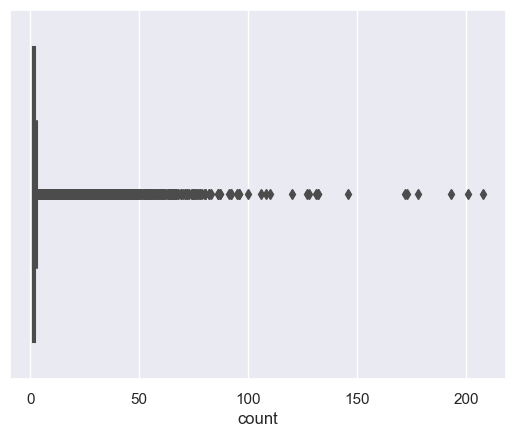

In [40]:
# Boxplot (qui ne présente que peu d'intérêt)
sns.boxplot(data=directeurs_counts,x='count')

In [41]:
# Détection d'outliers chez les supervisors
print(directeurs_counts.quantile(0.025))
print(directeurs_counts.quantile(0.975))

count    1.0
Name: 0.025, dtype: float64
count    15.0
Name: 0.975, dtype: float64


In [42]:
# Vérification des outliers
outliers_directeurs=directeurs_counts[directeurs_counts['count']>15]
outliers_directeurs

,Identifiant directeur,Directeur de these (nom prenom),count
88847,59375140,Scherrmann Jean-Michel,208
48488,26730774,Blanc Francois-Paul,201
48728,26756625,Brunel Pierre,193
59817,29561248,Delebecque Philippe,178
136355,98531891,Bertucat Michel,173
...,...,...,...
5463,06945065X,Gallo Roger,16
116764,76620956,Daculsi Guy,16
51849,26990814,Linhart Daniele,16
71843,33124825,Loussouarn Yvon,16


Le cas Jean-Michel Scherrmann

In [43]:
# Sélection des thèses encadrées par Scherrmann
scherrmann= directeurs[directeurs["Directeur de these (nom prenom)"]=="Scherrmann Jean-Michel"]

# Groupement des thèses en fonction de la discipline et de l'année
scherrmann=scherrmann.groupby(["Discipline_pred","annee"]).size().reset_index(name="count")
scherrmann["annee"]=scherrmann["annee"].astype(int)

# Affichage du dataframe obtenu
scherrmann

,Discipline_pred,annee,count
0,Biologie,1989,11
1,Biologie,1990,13
2,Biologie,1991,11
3,Biologie,1992,22
4,Biologie,1993,28
5,Biologie,1994,40
6,Biologie,1995,27
7,Biologie,1996,24
8,Biologie,1997,6
9,Biologie,1998,2


In [44]:
# Sauvegarde en format LaTex
table_scherrmann=scherrmann.style.to_latex()
table_scherrmann

'\\begin{tabular}{llrr}\n & Discipline_pred & annee & count \\\\\n0 & Biologie & 1989 & 11 \\\\\n1 & Biologie & 1990 & 13 \\\\\n2 & Biologie & 1991 & 11 \\\\\n3 & Biologie & 1992 & 22 \\\\\n4 & Biologie & 1993 & 28 \\\\\n5 & Biologie & 1994 & 40 \\\\\n6 & Biologie & 1995 & 27 \\\\\n7 & Biologie & 1996 & 24 \\\\\n8 & Biologie & 1997 & 6 \\\\\n9 & Biologie & 1998 & 2 \\\\\n10 & Biologie & 1999 & 6 \\\\\n11 & Biologie & 2000 & 2 \\\\\n12 & Biologie & 2001 & 1 \\\\\n13 & Biologie & 2003 & 3 \\\\\n14 & Biologie & 2004 & 1 \\\\\n15 & Biologie & 2005 & 1 \\\\\n16 & Biologie & 2007 & 1 \\\\\n17 & Biologie & 2008 & 2 \\\\\n18 & Biologie & 2009 & 2 \\\\\n19 & Biologie & 2011 & 1 \\\\\n20 & Biologie & 2012 & 1 \\\\\n21 & Medecine & 1995 & 1 \\\\\n22 & Medecine & 1996 & 1 \\\\\n23 & Psychologie & 1997 & 1 \\\\\n\\end{tabular}\n'

Travail sur la langue d'écriture

In [45]:
# Sélection des langues et années
langues=theses[["Langue de la these","annee"]].dropna()

# Suppression des lignes inexploitables
langues=langues[langues["Langue de la these"]!="na"]

# Transformation de l'année en nombre entier
langues["annee"]=langues["annee"].astype(int)

# Affichage du nombre de lignes du dataframe
print(len(langues))

# Affichage du dataframe obtenu
langues

383151


,Langue de la these,annee
2,fr,1993
79,fr,2015
134,fr,2015
318,fr,2013
376,fr,2013
...,...,...
448030,fr,2020
448031,en,2018
448033,fr,2020
448038,fr,2019


In [46]:
# Nombre de modalités pour les langues
modalites = langues['Langue de la these'].unique()

# Affichage du nombre de lignes avec un code de langue différent
print(len(modalites))

# Affichage du dataframe obtenu
modalites

205


array(['fr', 'en', 'ro', 'es', 'de', 'FR', 'zh', 'bs', 'it', 'co', 'fren',
       'enfr', 'enzh', 'pt', 'frensl', 'fres', 'zhen', 'esen', 'itfr',
       'frel', 'cs', 'frpten', 'hu', 'enfrde', 'esenfr', 'frpl', 'elfr',
       'frhu', 'frar', 'itfren', 'frit', 'frzh', 'enfrzh', 'frvi',
       'frenes', 'ru', 'defr', 'pl', 'bg', 'frkm', 'kkenfr', 'frcs',
       'ptfren', 'el', 'enfreu', 'pten', 'frpt', 'esfr', 'ptfr', 'rufr',
       'br', 'cafr', 'sr', 'enru', 'ensl', 'frde', 'frja', 'frla', 'ar',
       'ca', 'fraf', 'eu', 'enesfr', 'freu', 'rofr', 'frgrc', 'enpt',
       'encsfr', 'he', 'enptfr', 'enit', 'fresen', 'enpl', 'sv', 'eufr',
       'enfrpt', 'frbr', 'ukfren', 'frruen', 'arfr', 'hyfrru', 'csfrsk',
       'frhe', 'frru', 'brfr', 'akfr', 'zhfr', 'frms', 'enfrpl', 'frmn',
       'enfrit', 'envi', 'frro', 'frfy', 'frsl', 'enfres', 'frqu', 'as',
       'frln', 'frenpt', 'abfr', 'uk', 'roen', 'plen', 'frenzh',
       'frendees', 'enfrcs', 'itzh', 'cofr', 'frtch', 'eufres', 'ja',
  

In [47]:
# Recodage de la langue d'écriture
# Création d'un dictionnaire de correspondance personnalisé
lang_to_code = {'fr': 'Français', 'en': 'Anglais', 'enfr': 'Bilingue','fren':'Bilingue','FR':'Français'}

# Définition d'une fonction qui applique la correspondance
def recode_language(lang):
    return lang_to_code.get(lang, 'Autre')

# Application de la correspondance à la colonne 'langue'
langues['language_rec'] = langues['Langue de la these'].apply(recode_language)

# Affichage du nombre de lignes du dataframe
print(len(langues))

# Affichage du dataframe obtenu
langues

383151


,Langue de la these,annee,language_rec
2,fr,1993,Français
79,fr,2015,Français
134,fr,2015,Français
318,fr,2013,Français
376,fr,2013,Français
...,...,...,...
448030,fr,2020,Français
448031,en,2018,Anglais
448033,fr,2020,Français
448038,fr,2019,Français


In [48]:
# Nombre de thèses "autre" sur le jeu de données
autre=langues[langues["language_rec"]=="Autre"]

# Affichage du nombre de lignes du dataframe
len(autre)

3162

In [49]:
# Groupement des langues par langue et par année
langues_count=langues.groupby(["language_rec","annee"]).size()
langues_count=langues_count.reset_index(name='count')

# Obtention des pourcentages par langue et par an
langues_count["pourcentage"] = langues_count.groupby("annee")["count"].apply(lambda x: (x / x.sum()) * 100)
langues_count=langues_count.reset_index(drop=False)

# Sélection des années 1990 à 2018
langues_count=langues_count[(langues_count["annee"]>=1990)&(langues_count["annee"]<=2018)]

# Affichage du dataframe obtenu
langues_count

,index,language_rec,annee,count,pourcentage
5,5,Anglais,1990,12,0.108982
6,6,Anglais,1991,14,0.129259
7,7,Anglais,1992,28,0.232095
8,8,Anglais,1993,33,0.268118
9,9,Anglais,1994,30,0.230929
...,...,...,...,...,...
143,143,Français,2014,9083,72.484239
144,144,Français,2015,8570,69.001610
145,145,Français,2016,8220,66.807542
146,146,Français,2017,8216,65.429641


In [50]:
#Groupement par langue et par année
langues_stacked = langues_count['language_rec'].unique()
data = {}
for langue in langues_stacked:
    data[langue] = langues_count[langues_count['language_rec'] == langue].groupby('annee').sum()['count']

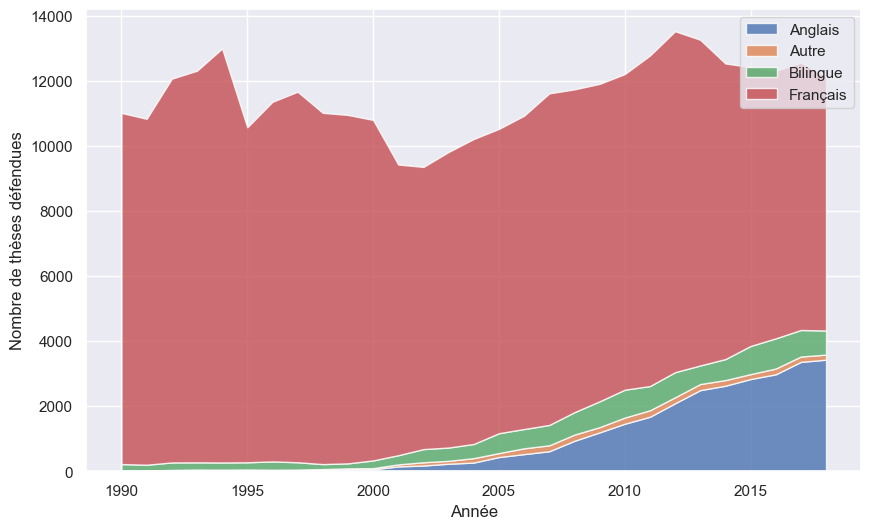

In [51]:
# Création d'un stacked area plot pour chaque langue
plt.figure(figsize=(10,6))
plt.stackplot(langues_count['annee'].unique(),
              *[data[langue] for langue in langues_stacked], 
              labels=langues_stacked, alpha=0.8)

# Ajout des étiquettes d'axe et de titre
plt.xlabel('Année')
plt.ylabel('Nombre de thèses défendues')
plt.legend(loc='best')

# Affichage du graphique
plt.show()